<a href="https://colab.research.google.com/github/omkarwazulkar/ImbalancedClassificationProjects/blob/main/Haberman_Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pandas import read_csv

data = '/content/drive/MyDrive/Dataset/Datasets/haberman.csv'
columns = ['Age', 'Year', 'Nodes', 'Class']
dataframe = read_csv(data, header = None, names = columns)
print(dataframe)

     Age  Year  Nodes  Class
0     30    64      1      1
1     30    62      3      1
2     30    65      0      1
3     31    59      2      1
4     31    65      4      1
..   ...   ...    ...    ...
301   75    62      1      1
302   76    67      0      1
303   77    65      3      1
304   78    65      1      2
305   83    58      2      2

[306 rows x 4 columns]


In [ ]:
summary = dataframe.describe()
print(summary) 

              Age        Year       Nodes       Class
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


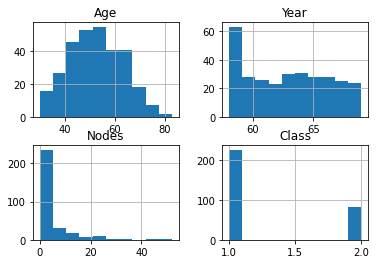

In [ ]:
# Plotting Histogram of Each Columns to Find the Distribution
from matplotlib import pyplot

dataframe.hist()
pyplot.show()

In [ ]:
# Class Distribution
from collections import Counter

target = dataframe['Class'].values
counter = Counter(target)
print(counter)
for k, v in counter.items() :
  per = v / len(target) * 100
  print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Counter({1: 225, 2: 81})
Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


In [ ]:
path = '/content/drive/MyDrive/Dataset/Datasets/haberman.csv'

In [ ]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder

def load_dataset(path):
  data = read_csv(path, header = None)
  data = data.values
  X, y = data[:, :-1], data[:, -1]
  y = LabelEncoder().fit_transform(y)
  return X, y

In [ ]:
from sklearn.metrics import brier_score_loss

def brier_score(y_true, y_prob):
  ref_prob = [0.26471 for _ in range (len(y_true))]
  bs_ref = brier_score_loss(y_true, ref_prob)
  bs_model = brier_score_loss(y_true, y_prob)
  return 1.0 - (bs_model / bs_ref)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

def evaluate_model(X, y, model):
  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
  metric = make_scorer(brier_score, needs_proba = True)
  scores = cross_val_score(model, X, y, scoring = metric, cv = cv, n_jobs = 1)
  return scores

In [ ]:
from collections import Counter
from sklearn.dummy import DummyClassifier
from numpy import std
from numpy import mean

X, y = load_dataset(path)
print(X, y)
print(X.shape, y.shape, Counter(y))
model = DummyClassifier(strategy = 'prior')
scores = evaluate_model(X, y, model)
print('Mean BSS: %.3f (%.3f)' % (mean(scores), std(scores)))

[[30 64  1]
 [30 62  3]
 [30 65  0]
 [31 59  2]
 [31 65  4]
 [33 58 10]
 [33 60  0]
 [34 59  0]
 [34 66  9]
 [34 58 30]
 [34 60  1]
 [34 61 10]
 [34 67  7]
 [34 60  0]
 [35 64 13]
 [35 63  0]
 [36 60  1]
 [36 69  0]
 [37 60  0]
 [37 63  0]
 [37 58  0]
 [37 59  6]
 [37 60 15]
 [37 63  0]
 [38 69 21]
 [38 59  2]
 [38 60  0]
 [38 60  0]
 [38 62  3]
 [38 64  1]
 [38 66  0]
 [38 66 11]
 [38 60  1]
 [38 67  5]
 [39 66  0]
 [39 63  0]
 [39 67  0]
 [39 58  0]
 [39 59  2]
 [39 63  4]
 [40 58  2]
 [40 58  0]
 [40 65  0]
 [41 60 23]
 [41 64  0]
 [41 67  0]
 [41 58  0]
 [41 59  8]
 [41 59  0]
 [41 64  0]
 [41 69  8]
 [41 65  0]
 [41 65  0]
 [42 69  1]
 [42 59  0]
 [42 58  0]
 [42 60  1]
 [42 59  2]
 [42 61  4]
 [42 62 20]
 [42 65  0]
 [42 63  1]
 [43 58 52]
 [43 59  2]
 [43 64  0]
 [43 64  0]
 [43 63 14]
 [43 64  2]
 [43 64  3]
 [43 60  0]
 [43 63  2]
 [43 65  0]
 [43 66  4]
 [44 64  6]
 [44 58  9]
 [44 63 19]
 [44 61  0]
 [44 63  1]
 [44 61  0]
 [44 67 16]
 [45 65  6]
 [45 66  0]
 [45 67  1]
 [45

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier

def get_models():
  models, names = list(), list()
  # LR
  models.append(LogisticRegression(solver='lbfgs'))
  names.append('LR')
  # LDA
  models.append(LinearDiscriminantAnalysis())
  names.append('LDA')
  # QDA
  models.append(QuadraticDiscriminantAnalysis())
  names.append('QDA')
  # GNB
  models.append(GaussianNB())
  names.append('GNB')
  # MNB
  models.append(MultinomialNB())
  names.append('MNB')
  # GPC
  models.append(GaussianProcessClassifier())
  names.append('GPC')
  return models, names

[LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), GaussianNB(), MultinomialNB(), GaussianProcessClassifier()] ['LR', 'LDA', 'QDA', 'GNB', 'MNB', 'GPC']
>LR 0.060 (0.143)
>LDA 0.064 (0.154)
>QDA 0.027 (0.221)
>GNB 0.012 (0.212)
>MNB -0.211 (0.369)
>GPC -0.142 (0.041)


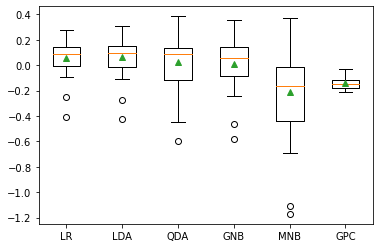

In [ ]:
models, names = get_models()
print(models, names)

results = list()
for i in range(len(models)):
  scores = evaluate_model(X, y, models[i])
  results.append(scores)
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels = names, showmeans = True)
pyplot.show()

In [ ]:
def get_models():
  models, names = list(), list()
  # LR
  models.append(LogisticRegression(solver='lbfgs'))
  names.append('LR')
  # LDA
  models.append(LinearDiscriminantAnalysis())
  names.append('LDA')
  # QDA
  models.append(QuadraticDiscriminantAnalysis())
  names.append('QDA')
  # GNB
  models.append(GaussianNB())
  names.append('GNB')
  # GPC
  models.append(GaussianProcessClassifier())
  names.append('GPC')
  return models, names

>LR 0.062 (0.140)
>LDA 0.064 (0.154)
>QDA 0.027 (0.221)
>GNB 0.012 (0.212)
>GPC 0.097 (0.133)


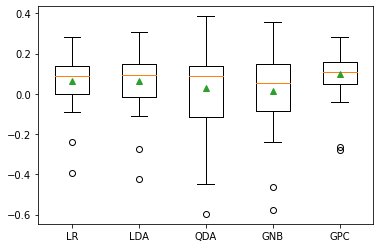

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

models, names = get_models()
results = list()

for i in range(len(models)):
  pipeline = Pipeline(steps = [('t', StandardScaler()), ('m', models[i])])
  scores = evaluate_model(X, y, pipeline)
  results.append(scores)
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
def get_models():
  models, names = list(), list()
  # LR
  models.append(LogisticRegression(solver='lbfgs'))
  names.append('LR')
  # LDA
  models.append(LinearDiscriminantAnalysis())
  names.append('LDA')
  # GPC
  models.append(GaussianProcessClassifier())
  names.append('GPC')
  return models, names

>LR 0.110 (0.142)
>LDA 0.107 (0.164)
>GPC 0.100 (0.130)


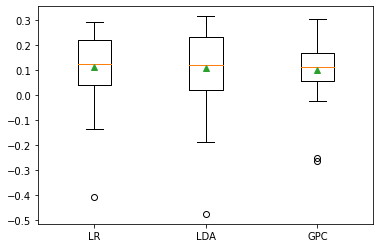

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

models, names = get_models()
results = list()

for i in range(len(models)):
  steps = [('t1', MinMaxScaler()), ('t2', PowerTransformer()),('m',models[i])]
  pipeline = Pipeline(steps=steps)
  scores = evaluate_model(X, y, pipeline)
  results.append(scores)
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

def load_dataset(full_path):
  data = read_csv(full_path, header=None)
  data = data.values
  X, y = data[:, :-1], data[:, -1]
  y = LabelEncoder().fit_transform(y)
  return X, y

full_path = '/content/drive/MyDrive/Dataset/Datasets/haberman.csv'
X, y = load_dataset(full_path)
steps = [('t1', MinMaxScaler()),('t2', PowerTransformer()),('m',LogisticRegression(solver='lbfgs'))]
model = Pipeline(steps=steps)
model.fit(X, y)
print(X, y)
print(model)

[[30 64  1]
 [30 62  3]
 [30 65  0]
 [31 59  2]
 [31 65  4]
 [33 58 10]
 [33 60  0]
 [34 59  0]
 [34 66  9]
 [34 58 30]
 [34 60  1]
 [34 61 10]
 [34 67  7]
 [34 60  0]
 [35 64 13]
 [35 63  0]
 [36 60  1]
 [36 69  0]
 [37 60  0]
 [37 63  0]
 [37 58  0]
 [37 59  6]
 [37 60 15]
 [37 63  0]
 [38 69 21]
 [38 59  2]
 [38 60  0]
 [38 60  0]
 [38 62  3]
 [38 64  1]
 [38 66  0]
 [38 66 11]
 [38 60  1]
 [38 67  5]
 [39 66  0]
 [39 63  0]
 [39 67  0]
 [39 58  0]
 [39 59  2]
 [39 63  4]
 [40 58  2]
 [40 58  0]
 [40 65  0]
 [41 60 23]
 [41 64  0]
 [41 67  0]
 [41 58  0]
 [41 59  8]
 [41 59  0]
 [41 64  0]
 [41 69  8]
 [41 65  0]
 [41 65  0]
 [42 69  1]
 [42 59  0]
 [42 58  0]
 [42 60  1]
 [42 59  2]
 [42 61  4]
 [42 62 20]
 [42 65  0]
 [42 63  1]
 [43 58 52]
 [43 59  2]
 [43 64  0]
 [43 64  0]
 [43 63 14]
 [43 64  2]
 [43 64  3]
 [43 60  0]
 [43 63  2]
 [43 65  0]
 [43 66  4]
 [44 64  6]
 [44 58  9]
 [44 63 19]
 [44 61  0]
 [44 63  1]
 [44 61  0]
 [44 67 16]
 [45 65  6]
 [45 66  0]
 [45 67  1]
 [45

In [ ]:
print('Survival Cases:')
data = [[31,59,2], [31,65,4], [34,60,1]]
for row in data:
  yhat = model.predict_proba([row])
  p_survive = yhat[0, 0] * 100
  print('>data=%s, Survival=%.3f%%' % (row, p_survive))


Survival Cases:
>data=[31, 59, 2], Survival=83.597%
>data=[31, 65, 4], Survival=77.264%
>data=[34, 60, 1], Survival=86.776%


In [ ]:
print('Non Survival Cases:')
data = [[44,64,6], [34,66,9], [38,69,21]]
for row in data:
  yhat = model.predict_proba([row])
  p_survive = yhat[0, 0] * 100
  print('>data=%s, Non Survival=%.3f%%' % (row, p_survive))

Non Survival Cases:
>data=[44, 64, 6], Non Survival=63.092%
>data=[34, 66, 9], Non Survival=63.452%
>data=[38, 69, 21], Non Survival=53.389%
